In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
warnings.filterwarnings('ignore')

In [ ]:
df_20_21 = pd.read_csv('/content/drive/MyDrive/Data project folder/Colonial Student File 21_clean.csv')
df_21_22 = pd.read_csv('/content/drive/MyDrive/Data project folder/Colonial Student File 22_clean.csv')
df_22_23 = pd.read_csv('/content/drive/MyDrive/Data project folder/Colonial Student File 23_clean.csv')

In [ ]:
df_final = pd.concat([df_20_21, df_21_22, df_22_23])
print(df_final.shape)

df_final.to_csv('/content/drive/MyDrive/Data project folder/Colonial_final.csv')

(21167, 10)


In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21167 entries, 0 to 9755
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Student ID         21167 non-null  int64  
 1   Academic Year      21167 non-null  object 
 2   District           21167 non-null  object 
 3   Grade              21167 non-null  int64  
 4   Race/Ethnicity     21167 non-null  object 
 5   Teacher ID         21167 non-null  object 
 6   Score              21167 non-null  int64  
 7   Proficiency Level  21167 non-null  float64
 8   School             21167 non-null  object 
 9   Course             21167 non-null  object 
dtypes: float64(1), int64(3), object(6)
memory usage: 1.8+ MB


In [ ]:
df_final[['Score','Proficiency Level']].describe()

,Score,Proficiency Level
count,21167.000000,21167.000000
mean,2130.334105,1.705201
std,751.681941,0.947314
min,0.000000,0.000000
25%,2322.000000,1.000000
50%,2416.000000,1.000000
75%,2494.000000,2.000000
max,2855.000000,4.000000


In [ ]:
# 10 schools with highest avearge scores in ELA
df_school_ela = df_final[df_final.Course=='ELA'].groupby('School').agg(
    Num_of_students_ela=pd.NamedAgg(column='Student ID', aggfunc='count'),
    Num_of_teachers_ela=pd.NamedAgg(column='Teacher ID', aggfunc='nunique'),
    Average_score_ela=pd.NamedAgg(column='Score', aggfunc=('mean'))).sort_values('Average_score_ela',ascending=False).reset_index()
df_school_ela['student_teacher_ratio_ela']=round(df_school_ela['Num_of_students_ela']/df_school_ela['Num_of_teachers_ela'],2)
df_school_ela['Average_score_ela']=round(df_school_ela['Average_score_ela'],2)
df_school_ela.head(10)

,School,Num_of_students_ela,Num_of_teachers_ela,Average_score_ela,student_teacher_ratio_ela
0,Gunning Bedford Middle,928,16,2516.86,58.00
1,George Read Middle,745,15,2498.79,49.67
2,McCullough Middle,698,15,2457.14,46.53
3,Kathleen H. Wilbur Elementary,630,26,2450.24,24.23
4,Read (George) Middle School,596,9,2437.53,66.22
5,Wilbur (Kathleen H.) Elementary,539,23,2434.98,23.43
6,Pleasantville Elementary,166,10,2421.61,16.60
7,Castle Hills Elementary,271,14,2414.19,19.36
8,Southern Elementary,502,28,2412.26,17.93
9,Carrie Downie Elementary,235,13,2407.15,18.08


In [ ]:
# 10 schools with highest avearge scores in Maths

df_school_math=df_final[df_final.Course=='MATH'].groupby('School').agg(
    Num_of_students_math=pd.NamedAgg(column='Student ID', aggfunc='count'),
    Num_of_teachers_math=pd.NamedAgg(column='Teacher ID', aggfunc='nunique'),
    Average_score_math=pd.NamedAgg(column='Score', aggfunc='mean')).sort_values('Average_score_math',ascending=False).reset_index()

df_school_math['student_teacher_ratio_math']=round(df_school_math['Num_of_students_math']/df_school_math['Num_of_teachers_math'],2)
df_school_math['Average_score_math']=round(df_school_math['Average_score_math'],2)
df_school_math.head(10)

,School,Num_of_students_math,Num_of_teachers_math,Average_score_math,student_teacher_ratio_math
0,Gunning Bedford Middle,949,14,2467.16,67.79
1,George Read Middle,728,16,2436.03,45.50
2,Kathleen H. Wilbur Elementary,629,27,2428.41,23.30
3,Wilbur (Kathleen H.) Elementary,539,23,2427.09,23.43
4,Castle Hills Elementary,274,14,2417.41,19.57
5,McCullough Middle,694,11,2416.36,63.09
6,Southern Elementary,504,29,2411.12,17.38
7,Pleasantville Elementary,166,10,2408.20,16.60
8,Read (George) Middle School,596,9,2406.18,66.22
9,Eisenberg (Harry O.) Elementary School,220,12,2402.48,18.33


In [ ]:
# Number of students and avearge ELA score by Grade
df_grade_ela = df_final[df_final.Course=='ELA'].groupby('Grade').agg(
    Num_of_students_ela=pd.NamedAgg(column='Student ID', aggfunc='count'),
    Average_score_ela=pd.NamedAgg(column='Score', aggfunc=('mean'))).sort_values('Grade').reset_index()
df_grade_ela['Average_score_ela']=round(df_grade_ela['Average_score_ela'],2)
df_grade_ela

,Grade,Num_of_students_ela,Average_score_ela
0,3,1540,2324.44
1,4,1477,2373.59
2,5,1583,2398.76
3,6,1738,2404.20
4,7,1468,2408.64
5,8,1465,2414.88
6,9,18,369.44
7,10,67,378.21
8,11,1259,418.76
9,12,6,445.00


In [ ]:
# Number of students and avearge Math score by Grade
df_grade_math = df_final[df_final.Course=='MATH'].groupby('Grade').agg(
    Num_of_students_math=pd.NamedAgg(column='Student ID', aggfunc='count'),
    Average_score_math=pd.NamedAgg(column='Score', aggfunc=('mean'))).sort_values('Grade').reset_index()
df_grade_math['Average_score_math']=round(df_grade_math['Average_score_math'],2)
df_grade_math

,Grade,Num_of_students_math,Average_score_math
0,3,1538,2336.93
1,4,1478,2373.30
2,5,1589,2397.15
3,6,1519,2361.08
4,7,1595,2370.12
5,8,1518,2366.57
6,9,25,361.60
7,10,102,380.78
8,11,1180,404.27
9,12,2,425.00


<Axes: >

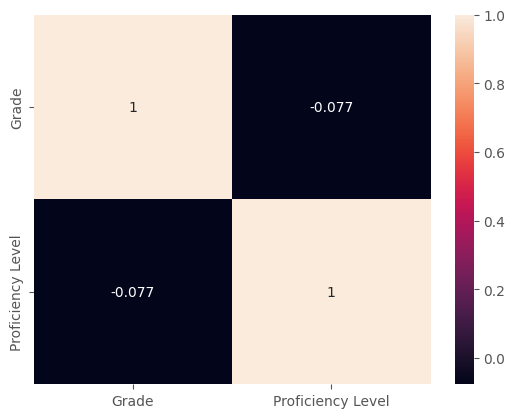

In [ ]:
#correlation
df_corr=df_final[~(df_final.Grade.isin([9,10,11]))][['Grade','Proficiency Level']].dropna().corr()
#correlation through heatmap
sns.heatmap(df_corr,annot=True)

Vizualization

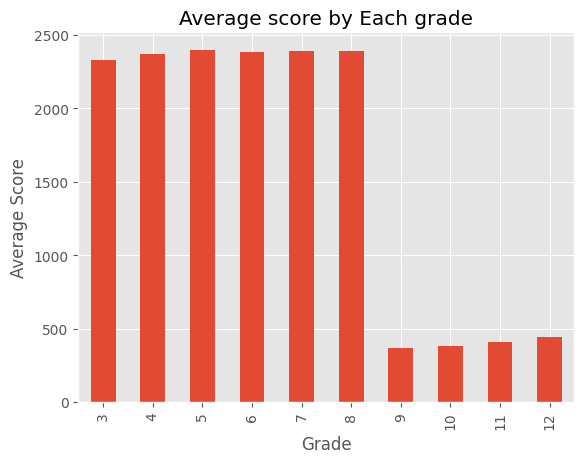

In [ ]:
ax=df_final.groupby('Grade')['Score'].agg('mean').plot(kind='bar',title='Average score by Each grade')
ax.set_xlabel('Grade')
ax.set_ylabel('Average Score')
plt.show()

In [ ]:
df_year_grade = df_final.groupby(['Academic Year','Grade'])['Score'].agg('mean').reset_index()
df_year_grade

In [ ]:
# The average score of students for each grade by academic year
pivot = df_year_grade.pivot_table(index=['Grade'],
                      columns=df_year_grade['Academic Year'],
                       values=['Score'])
pivot

Score                          
Academic Year    2020-2021    2021-2022    2022-2023
Grade                                               
3              2371.878354  2373.934223  2284.149660
4              2416.404844  2411.841808  2334.032842
5              2442.400668  2449.544078  2339.638621
6              2466.178879  2447.870943  2300.575613
7              2505.919753  2467.865467  2305.534987
8              2468.744318  2480.484448  2304.959237
9               388.333333   361.081081          NaN
10              372.972973   381.666667          NaN
11              442.411642   438.723404   352.439336
12                     NaN   440.000000          NaN

As we can see the score of students reduces in year 2022-2023.

In [ ]:
#answer questions
#1. total number of students in each school and their avaerage score
#2. Average score of students by schools and course.
#3. student teacher ratio by each school
#4. change in score over time by school and courses
#5. Average Score of students by race and courses
#7. Relationship between scores and grade by courses.